# F1 race Win Predictor
## Importing libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

## Importing the data

In [2]:
result_df = pd.read_csv('../input/formula-1-world-championship-1950-2020/results.csv')
stats_df = pd.read_csv('../input/formula-1-world-championship-1950-2020/status.csv')
drivers_df = pd.read_csv('../input/formula-1-world-championship-1950-2020/drivers.csv')
races_df = pd.read_csv('../input/formula-1-world-championship-1950-2020/races.csv')
constructor_df = pd.read_csv('../input/formula-1-world-championship-1950-2020/constructors.csv')
driver_standings_df = pd.read_csv('../input/formula-1-world-championship-1950-2020/driver_standings.csv')
pd.get_option("display.max_columns",None)

In [3]:
result_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [4]:
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [5]:
races_df.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [6]:
constructor_df.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [7]:
driver_standings_df.head() 

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


## Setting the features

In [8]:
con1=pd.merge(result_df,races_df,on='raceId')
con2=pd.merge(con1,drivers_df,on='driverId')
con3=pd.merge(con2,driver_standings_df,on='driverId')
con4=pd.merge(con3,constructor_df,on='constructorId')
df=pd.merge(con4,stats_df,on='statusId')
pd.get_option("display.max_columns",None)
df.head()

,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,laps,time_x,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,round,circuitId,name_x,date,time_y,url_x,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,driverRef,number_y,code,forename,surname,dob,nationality_x,url_y,driverStandingsId,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name_y,nationality_y,url,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [9]:
df.isna().sum()

resultId             0
raceId_x             0
driverId             0
constructorId        0
number_x             0
grid                 0
position_x           0
positionText_x       0
positionOrder        0
points_x             0
laps                 0
time_x               0
milliseconds         0
fastestLap           0
rank                 0
fastestLapTime       0
fastestLapSpeed      0
statusId             0
year                 0
round                0
circuitId            0
name_x               0
date                 0
time_y               0
url_x                0
fp1_date             0
fp1_time             0
fp2_date             0
fp2_time             0
fp3_date             0
fp3_time             0
quali_date           0
quali_time           0
sprint_date          0
sprint_time          0
driverRef            0
number_y             0
code                 0
forename             0
surname              0
dob                  0
nationality_x        0
url_y                0
driverStand

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3537627 entries, 0 to 3537626
Data columns (total 54 columns):
 #   Column             Dtype  
---  ------             -----  
 0   resultId           int64  
 1   raceId_x           int64  
 2   driverId           int64  
 3   constructorId      int64  
 4   number_x           object 
 5   grid               int64  
 6   position_x         object 
 7   positionText_x     object 
 8   positionOrder      int64  
 9   points_x           float64
 10  laps               int64  
 11  time_x             object 
 12  milliseconds       object 
 13  fastestLap         object 
 14  rank               object 
 15  fastestLapTime     object 
 16  fastestLapSpeed    object 
 17  statusId           int64  
 18  year               int64  
 19  round              int64  
 20  circuitId          int64  
 21  name_x             object 
 22  date               object 
 23  time_y             object 
 24  url_x              object 
 25  fp1_date          

In [11]:
#df.desc().T is used to display the transpose of the table(for better looks)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
resultId,3537627.0,12630.091396,8209.508032,1.0,5125.0,11763.0,21140.0,26085.0
raceId_x,3537627.0,517.066570,331.536193,1.0,234.0,467.0,856.0,1110.0
driverId,3537627.0,204.182795,265.852299,1.0,20.0,105.0,229.0,858.0
constructorId,3537627.0,39.412151,56.860468,1.0,6.0,16.0,37.0,214.0
grid,3537627.0,9.763203,6.557031,0.0,4.0,9.0,15.0,34.0
positionOrder,3537627.0,11.229562,7.378775,1.0,5.0,10.0,17.0,39.0
points_x,3537627.0,2.998598,5.334331,0.0,0.0,0.0,4.0,50.0
laps,3537627.0,48.362040,25.123229,0.0,32.0,55.0,67.0,200.0
statusId,3537627.0,13.238133,22.544512,1.0,1.0,5.0,12.0,141.0
year,3537627.0,1996.431836,17.335956,1950.0,1984.0,1998.0,2011.0,2023.0


In [12]:
print(df.columns)

Index(['resultId', 'raceId_x', 'driverId', 'constructorId', 'number_x', 'grid',
       'position_x', 'positionText_x', 'positionOrder', 'points_x', 'laps',
       'time_x', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId', 'name_x',
       'date', 'time_y', 'url_x', 'fp1_date', 'fp1_time', 'fp2_date',
       'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time',
       'sprint_date', 'sprint_time', 'driverRef', 'number_y', 'code',
       'forename', 'surname', 'dob', 'nationality_x', 'url_y',
       'driverStandingsId', 'raceId_y', 'points_y', 'position_y',
       'positionText_y', 'wins', 'constructorRef', 'name_y', 'nationality_y',
       'url', 'status'],
      dtype='object')


## Removing unwanted columns from feature table

In [13]:
#removing unwanted columns from table
columns_to_drop = ['url_y', 'url_x','url', 'position_x', 'fastestLapTime', 'positionText_x', 'time_x','time_y', 'driverRef',
                   'constructorRef', 'nationality_y', 'positionText_y', 'raceId_y', 'points_y']
df = df.drop(columns=columns_to_drop,axis=1)


In [14]:
colums_to_drop=['fp1_date','fp1_time','fp2_date','fp2_time','fp3_date','fp3_time','quali_date','quali_time','sprint_date','sprint_time','year','round','circuitId','date']
df = df.drop(columns=colums_to_drop,axis=1)

In [15]:
col_name = {'number_x':'number','milliseconds':'timetaken_in_millisec','fastestLapSpeed':'max_speed',
 'name_x':'grand_prix','number_y':'driver_num','code':'driver_code','nationality_x':'nationality','name_y':'company',
 'raceId_x':'racerId','points_x':'points','position_y':'position','company':'name'}

df.rename(columns=col_name,inplace=True)
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,grand_prix,driver_num,driver_code,forename,surname,dob,nationality,driverStandingsId,position,wins,company,status
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,Australian Grand Prix,44,HAM,Lewis,Hamilton,1985-01-07,British,1,1,1,McLaren,Finished
1,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,Australian Grand Prix,44,HAM,Lewis,Hamilton,1985-01-07,British,9,1,1,McLaren,Finished
2,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,Australian Grand Prix,44,HAM,Lewis,Hamilton,1985-01-07,British,27,3,1,McLaren,Finished
3,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,Australian Grand Prix,44,HAM,Lewis,Hamilton,1985-01-07,British,48,2,1,McLaren,Finished
4,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,Australian Grand Prix,44,HAM,Lewis,Hamilton,1985-01-07,British,69,3,1,McLaren,Finished


In [16]:
df['driver_name'] = df['forename']+" "+df['surname']
col=['forename','surname','grand_prix']
df = df.drop(columns=col,axis=1)

In [17]:
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_num,driver_code,dob,nationality,driverStandingsId,position,wins,company,status,driver_name
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton
1,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton
2,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton
3,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton
4,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton


## Changing datatypes

In [18]:
#changing datatype of dob from object to datetime
df['dob']=pd.to_datetime(df['dob'])

In [19]:
from datetime import datetime as dt
dates=dt.today()-df['dob']
age=dates.dt.days/365
df['age']=round(age)
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_num,driver_code,dob,nationality,driverStandingsId,position,wins,company,status,driver_name,age
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,39.0
1,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,39.0
2,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,39.0
3,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,39.0
4,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,39.0


In [20]:
#changing datatype of all objects to numeric
l = ['number','timetaken_in_millisec','fastestLap','rank','max_speed','driver_num']
for i in l:
    df[i] = pd.to_numeric(df[i],errors='coerce')

In [21]:
df.drop(columns='driver_num',axis=1,inplace=True)

In [22]:
#seperating numeric columns from object type columns
cat=[]
num=[]
for i in df.columns:
    if df[i].dtypes =='O':
         cat.append(i)
    else:
        num.append(i)

In [23]:
df[cat].head()

,driver_code,nationality,company,status,driver_name
0,HAM,British,McLaren,Finished,Lewis Hamilton
1,HAM,British,McLaren,Finished,Lewis Hamilton
2,HAM,British,McLaren,Finished,Lewis Hamilton
3,HAM,British,McLaren,Finished,Lewis Hamilton
4,HAM,British,McLaren,Finished,Lewis Hamilton


In [24]:
df[num].head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,dob,driverStandingsId,position,wins,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,1,1,1,39.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,9,1,1,39.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,27,3,1,39.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,48,2,1,39.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,69,3,1,39.0


In [25]:
#checking percentage of null/empty values in table
df.isnull().sum() / len(df) * 100

resultId                  0.000000
racerId                   0.000000
driverId                  0.000000
constructorId             0.000000
number                    0.004523
grid                      0.000000
positionOrder             0.000000
points                    0.000000
laps                      0.000000
timetaken_in_millisec    61.421936
fastestLap               60.511100
rank                     59.513764
max_speed                60.511100
statusId                  0.000000
driver_code               0.000000
dob                       0.000000
nationality               0.000000
driverStandingsId         0.000000
position                  0.000000
wins                      0.000000
company                   0.000000
status                    0.000000
driver_name               0.000000
age                       0.000000
dtype: float64

In [26]:
# replacing null values with mean values 
df[['rank','fastestLap']] = df[['rank','fastestLap']].fillna(0)
df['timetaken_in_millisec'] = df['timetaken_in_millisec'].fillna(df['timetaken_in_millisec'].mean())
df['max_speed']= df['max_speed'].fillna(df['max_speed'].mean())
df['number'] = df['number'].fillna(0)

In [27]:
df.isnull().sum() / len(df) * 100

resultId                 0.0
racerId                  0.0
driverId                 0.0
constructorId            0.0
number                   0.0
grid                     0.0
positionOrder            0.0
points                   0.0
laps                     0.0
timetaken_in_millisec    0.0
fastestLap               0.0
rank                     0.0
max_speed                0.0
statusId                 0.0
driver_code              0.0
dob                      0.0
nationality              0.0
driverStandingsId        0.0
position                 0.0
wins                     0.0
company                  0.0
status                   0.0
driver_name              0.0
age                      0.0
dtype: float64

In [28]:
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,company,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,39.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,39.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,39.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,39.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,39.0


## Data filteration

In [29]:
# filtering data by rdrivers who finished the race succesfully
dfin = df[df['status'] == 'Finished']
dfin.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,company,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,39.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,39.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,39.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,39.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,39.0


In [30]:
mean = df.max_speed.mean()
mean2 = df.fastestLap.mean()
df = dfin[dfin['max_speed']>mean]
df = df[df['age']<df['age'].mean()]
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,company,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,39.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,39.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,39.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,39.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,39.0


In [31]:
df.drop(columns='dob',axis=1,inplace=True)
df.drop(columns='statusId',axis=1,inplace=True)

## Skewness Treatment

In [32]:
#checking skewness of numeric columns
df.skew(numeric_only=True)

resultId                -0.258324
racerId                 -0.126828
driverId                 1.121618
constructorId            1.788285
number                   2.105417
grid                     0.904464
positionOrder            0.926466
points                   0.996958
laps                    -0.887817
timetaken_in_millisec    0.511147
fastestLap              -0.561921
rank                     0.770326
max_speed                0.921027
driverStandingsId       -0.630577
position                 0.702424
wins                     3.218526
age                     -0.261136
dtype: float64

In [33]:
# outlier removal by IQE method to numeric columns only
numeric_columns = df.select_dtypes(include=['number']).columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,driver_code,nationality,driverStandingsId,position,wins,company,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,HAM,British,1,1,1,McLaren,Finished,Lewis Hamilton,39.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,HAM,British,9,1,1,McLaren,Finished,Lewis Hamilton,39.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,HAM,British,27,3,1,McLaren,Finished,Lewis Hamilton,39.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,HAM,British,48,2,1,McLaren,Finished,Lewis Hamilton,39.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,HAM,British,69,3,1,McLaren,Finished,Lewis Hamilton,39.0


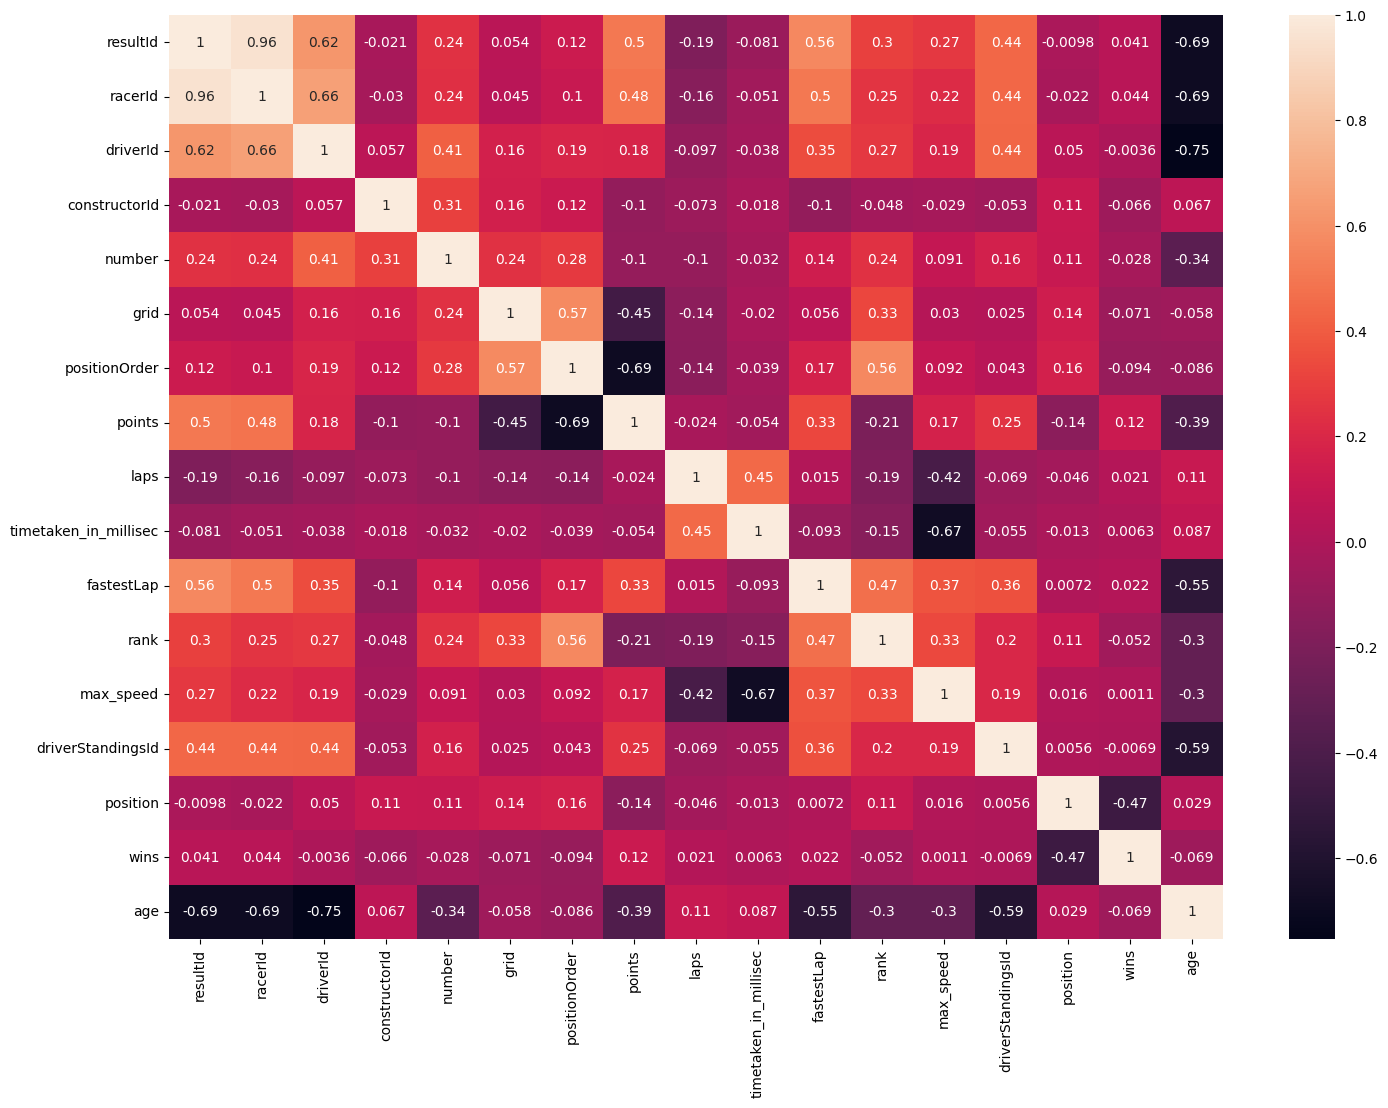

In [34]:
# plotting a heatmap
plt.figure(figsize=(17,12))
sns.heatmap(df[numeric_columns].corr(),annot=True)
plt.show()

In [35]:
num.remove('dob')
num.remove('statusId')

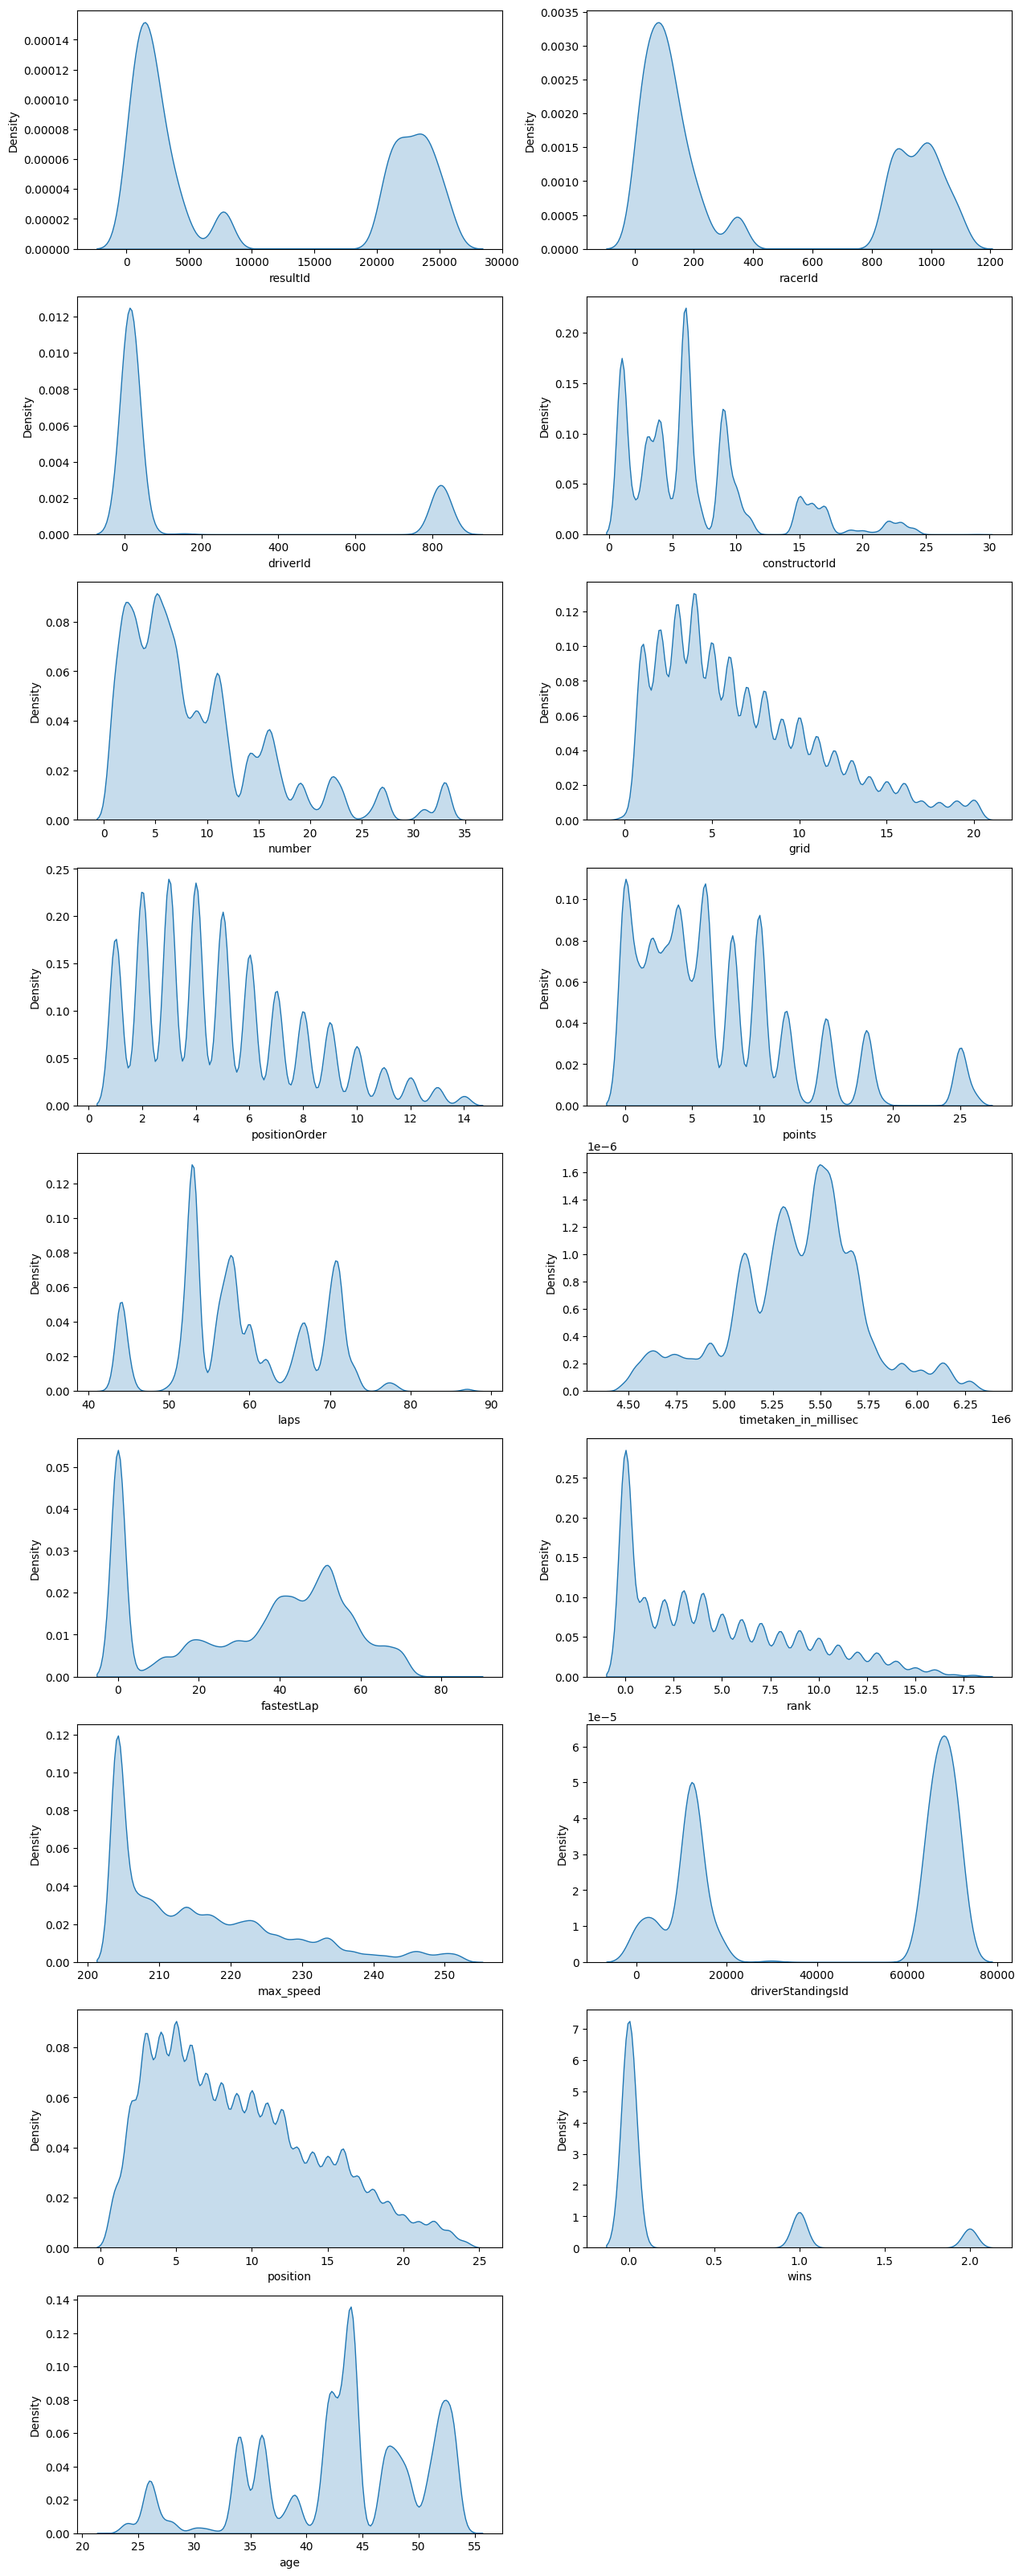

In [36]:
plt.figure(figsize=(15,50)) 
for i,j in zip(num,range(1,len(num)+1)):
    plt.subplot(11,2,j)
    sns.kdeplot(df[i],shade=True)
plt.show()

In [37]:
df.skew(numeric_only=True)

resultId                 0.354423
racerId                  0.516500
driverId                 1.588811
constructorId            1.275190
number                   1.377208
grid                     0.864992
positionOrder            0.745942
points                   1.220577
laps                     0.143233
timetaken_in_millisec   -0.230490
fastestLap              -0.301759
rank                     0.749021
max_speed                1.061304
driverStandingsId       -0.254020
position                 0.606529
wins                     2.081634
age                     -0.617192
dtype: float64

## Encoding

In [38]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [39]:
for i in cat:
    df[i]=le.fit_transform(df[i])
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,driver_code,nationality,driverStandingsId,position,wins,company,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,17,5,1,1,1,11,0,36,39.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,17,5,9,1,1,11,0,36,39.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,17,5,27,3,1,11,0,36,39.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,17,5,48,2,1,11,0,36,39.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,17,5,69,3,1,11,0,36,39.0


## **ML Algorithms**

In [40]:
x = df.drop(columns='driver_name',axis=1) #features
y = df.driver_name #label

In [41]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)

### Logistic Regression Model

In [42]:
# training the model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='sag')
lr.fit(xtrain, ytrain)

LogisticRegression(solver='sag')

In [43]:
# predicting the test set and finding the accuracy of model
from sklearn.metrics import accuracy_score
y_lr_pred=lr.predict(xtest)
score_lr=accuracy_score(y_lr_pred,ytest)*100
print("Logistic regression(solver='sag'):",score_lr)

Logistic regression(solver='sag'): 16.40238129915526


**The accuracy score of model is really low as the data was still skewed, thus we will use a scaler to normalize the data**

### Standard-Scaling

In [44]:
# scaling the training and test set
from sklearn.preprocessing import StandardScaler
std = StandardScaler().fit(xtrain)
xtrain_std = std.transform(xtrain)
xtest_std = std.transform(xtest)

**As we can see, after scaling the data, the model can predict with higher accuracy**

In [45]:
# training the model with scaled data and predicting the test set using it
lr.fit(xtrain_std,ytrain)
y_lr_pred=lr.predict(xtest_std)
score_lr=accuracy_score(y_lr_pred,ytest)*100
print("Logistic regression(solver='sag'):",score_lr)

Logistic regression(solver='sag'): 99.98907660937955


### Random Forest Classifier
**Using random forest, we got a perfect accuracy on our data**

In [46]:
from sklearn.ensemble import RandomForestClassifier
rn = RandomForestClassifier()
rn.fit(xtrain,ytrain)
ypred=rn.predict(xtest)
print(rn,":",accuracy_score(ypred,ytest)*100)

RandomForestClassifier() : 100.0


### Using Tensorflow
**Creating a neural network to predict on our data**

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_dim = xtrain.shape[1]
num_classes = len(set(ytrain))

# Create a simple neural network model
model = keras.Sequential([
    layers.Dense(20, activation='relu', input_dim=input_dim),
    layers.Dense(10, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # For integer labels
              metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(xtest, ytest)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
8011/8011 [==============================] - 27s 3ms/step - loss: 6291.3745 - accuracy: 0.0947 - val_loss: 3.1941 - val_accuracy: 0.1077
Epoch 2/10
8011/8011 [==============================] - 24s 3ms/step - loss: 3.1942 - accuracy: 0.1067 - val_loss: 3.1896 - val_accuracy: 0.1077
Epoch 3/10
8011/8011 [==============================] - 29s 4ms/step - loss: 3.1929 - accuracy: 0.1067 - val_loss: 3.1889 - val_accuracy: 0.1077
Epoch 4/10
8011/8011 [==============================] - 29s 4ms/step - loss: 3.1927 - accuracy: 0.1067 - val_loss: 3.1891 - val_accuracy: 0.1077
Epoch 5/10
8011/8011 [==============================] - 23s 3ms/step - loss: 3.1927 - accuracy: 0.1067 - val_loss: 3.1890 - val_accuracy: 0.1077
Epoch 6/10
3433/3433 [==============================] - 6s 2ms/step - loss: 3.1889 - accuracy: 0.1077
Test accuracy: 0.1077137365937233


**we did not achieve a high accuracy on the test data as it is skewed**

In [48]:
# Training the model on standardized data
model.fit(xtrain_std, ytrain, epochs=10, batch_size=32, validation_data=(xtest_std, ytest),callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(xtest_std, ytest)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
8011/8011 [==============================] - 23s 3ms/step - loss: 0.1503 - accuracy: 0.9689 - val_loss: 0.0171 - val_accuracy: 0.9970
Epoch 2/10
8011/8011 [==============================] - 23s 3ms/step - loss: 0.0070 - accuracy: 0.9987 - val_loss: 0.0019 - val_accuracy: 0.9998
Epoch 3/10
8011/8011 [==============================] - 23s 3ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 6.5466e-04 - val_accuracy: 1.0000
Epoch 4/10
8011/8011 [==============================] - 22s 3ms/step - loss: 3.6921e-04 - accuracy: 0.9999 - val_loss: 9.9288e-05 - val_accuracy: 1.0000
Epoch 5/10
8011/8011 [==============================] - 23s 3ms/step - loss: 3.0521e-04 - accuracy: 0.9999 - val_loss: 3.5182e-04 - val_accuracy: 0.9999
Epoch 6/10
8011/8011 [==============================] - 22s 3ms/step - loss: 1.8909e-04 - accuracy: 1.0000 - val_loss: 2.3780e-05 - val_accuracy: 1.0000
Epoch 7/10
8011/8011 [==============================] - 22s 3ms/step - loss: 1.7975e-04 - accuracy: 0.

**using the standised data, we got a perfect accuracy on our test set**